## 1 Preparing an environment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import scipy.stats as stats

In [3]:
df = pd.read_csv("Employee_monthly_salary.csv")

## 2 Statistical analysis

In [5]:
df.head(10)

,EmpID,Name,Gender,Date_of_Birth,Age,Join_Date,Tenure_in_org_in_months,GROSS,Net_Pay,Deduction,Deduction_percentage,Designation,Department
0,19575,Keven Norman,M,3/9/94,25,2/12/19,7,74922,71494,3428,4.58,Product Operations Analyst.Associate.,IT Product Management & Ops
1,19944,Kristin Werner,F,23/06/1994,26,13/01/2020,6,44375,39971,4404,9.92,Platform Operations Engineer.Associate.,Platform Operations
2,20055,Avery Barber,M,27/02/1996,24,14/11/2019,8,82263,77705,4558,5.54,Platform Operations Engineer.Associate.,Platform Operations
3,20058,Boris Gibson,M,29/09/1993,26,13/01/2020,6,44375,40164,4211,9.49,Platform Operations Engineer.Associate.,Platform Operations
4,20332,Leif Mack,M,1/5/91,29,4/6/18,25,235405,143963,91442,38.84,Software Engineer.Senior.,Enterprise Access Engineering
5,20849,Fredric Peters,M,29/04/1988,32,7/11/19,8,87300,57351,29949,34.31,LMS Administrator II..,Learning & Development
6,20852,Sherry Bowman,F,17/11/1992,27,13/01/2020,6,44375,39939,4436,10.00,Platform Operations Engineer.Associate.,Platform Operations
7,21115,Donte Richard,M,28/02/1996,24,13/01/2020,6,44375,41431,2944,6.63,Platform Operations Engineer.Associate.,Platform Operations
8,21437,Bobby Horton,M,13/11/1995,24,11/11/19,8,96995,91930,5065,5.22,Technical Solutions Engineer.Associate.,AmaTec - Weekend TSE
9,22043,Kenya Montoya,F,24/09/1995,24,13/01/2020,6,44375,39976,4399,9.91,Platform Operations Engineer.Associate.,Platform Operations


In [6]:
df.isna().sum()

EmpID                      0
Name                       0
Gender                     0
Date_of_Birth              0
Age                        0
Join_Date                  0
Tenure_in_org_in_months    0
GROSS                      0
Net_Pay                    0
Deduction                  0
Deduction_percentage       0
Designation                0
Department                 0
dtype: int64

The dataset has 1802 rows and 13 variables. There are no missing data.

In [7]:
df[['Age','Tenure_in_org_in_months','GROSS']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1802.0,31.516648,5.225084,21.0,28.0,31.0,35.00,56.0
Tenure_in_org_in_months,1802.0,48.376804,35.639826,6.0,23.0,39.0,66.00,190.0
GROSS,1802.0,175826.644839,105513.115257,256.0,104217.0,150330.0,221135.75,1024965.0


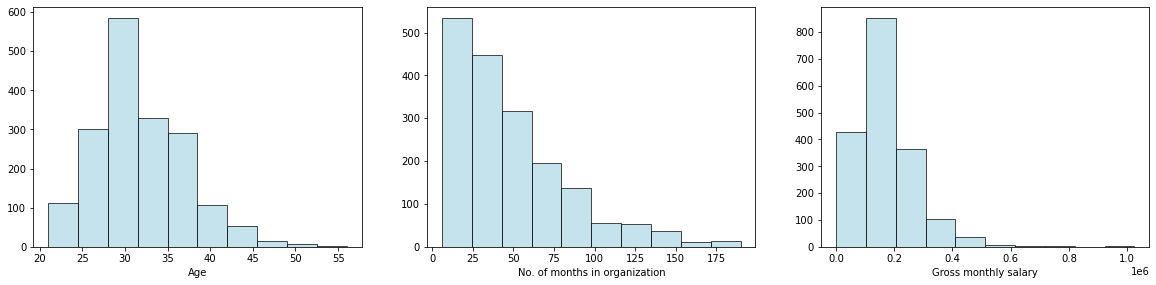

In [8]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df.Age, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Age')

plt.subplot(3,3,2)
plt.hist(df.Tenure_in_org_in_months, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('No. of months in organization')

plt.subplot(3,3,3)
plt.hist(df.GROSS, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Gross monthly salary')

plt.show()

In [9]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df.Age),stats.skew(df.Tenure_in_org_in_months),stats.skew(df.GROSS)]},
                        index=['Age','tenure','gross'])
Skewness

,Skewness
Age,0.713422
tenure,1.251010
gross,2.440103


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

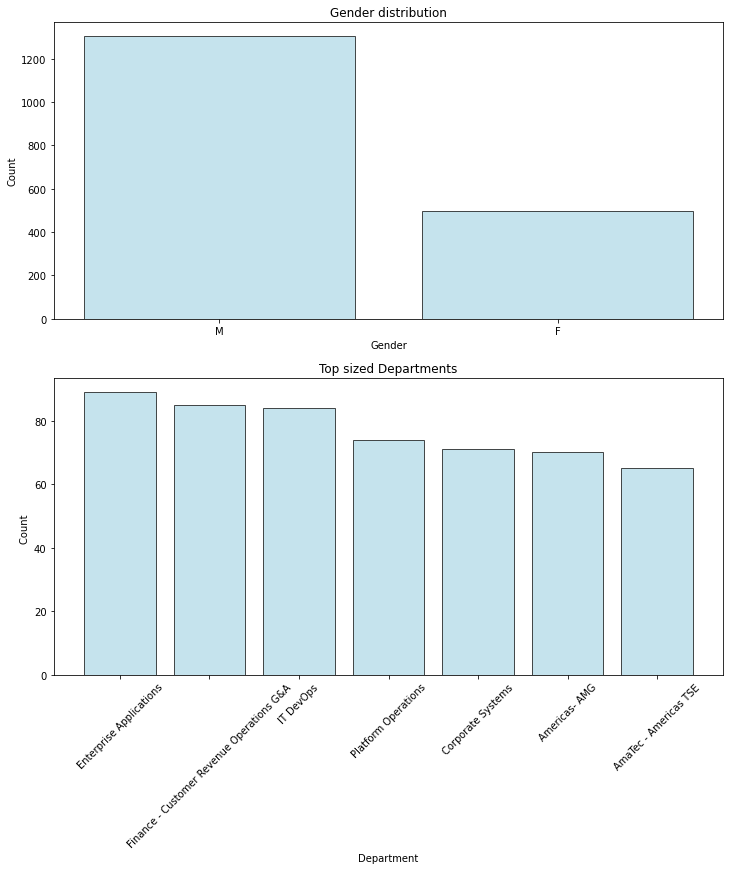

In [10]:
xaxis = df.Gender.value_counts().index    #Values for x-axis
yaxis = [df['Gender'].value_counts()[i] for i in xaxis]   # Count of each class on y-axis

plt.figure(figsize = (12,12))
plt.subplot(2,1,1)
plt.bar(xaxis,yaxis, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')

x2axis = df.Department.value_counts().head(7).index    #Values for x-axis
y2axis = [df['Department'].value_counts().head(7)[k] for k in x2axis]   # Count of each class on y-axis

plt.subplot(2,1,2)
plt.bar(x2axis,y2axis, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Department')
plt.ylabel('Count ')
plt.title("Top sized Departments")
plt.xticks(rotation=45)

In [11]:
departments = ['Enterprise Applications', 'Finance - Customer Revenue Operations G&A', 'IT DevOps','Platform Operations','Corporate Systems']
df1 = df.copy()
df1 = df[df['Department'].isin(departments)]

## 3 Simulation model

In [12]:
X = df1[['Age', 'Gender', 'Tenure_in_org_in_months','Department']]
y = df1["GROSS"]

label_encoder = LabelEncoder()
X["Gender"] = label_encoder.fit_transform(X["Gender"])
X["Department"] = label_encoder.fit_transform(X["Department"])

scaler = StandardScaler()
X = scaler.fit_transform(X)

C:\Users\skach\AppData\Local\Temp/ipykernel_3408/3340056906.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Gender"] = label_encoder.fit_transform(X["Gender"])
C:\Users\skach\AppData\Local\Temp/ipykernel_3408/3340056906.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Department"] = label_encoder.fit_transform(X["Department"])


#### EMPLOYEE DRAW

In [13]:
num_employees = 100

new_employees = pd.DataFrame({
    'Age': np.random.randint(20,45, size=num_employees),
    'Gender': np.random.choice(df1['Gender'], size=num_employees),
    'Experience': np.random.randint(12,84, size=num_employees),
    'Department': np.random.choice(df1['Department'], size=num_employees)
})

base = new_employees.copy()

new_employees["Gender"] = label_encoder.fit_transform(new_employees["Gender"])
new_employees["Department"] = label_encoder.fit_transform(new_employees["Department"])

new_employees = scaler.transform(new_employees)

#### SIMULATION

In [14]:
simulations = 100
simulation_results = []
for i in range(simulations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    #print("Mean Absolute Error:", mae)

    predicted_salary = model.predict(new_employees)
    simulation_results.append(predicted_salary)

In [15]:
for i, array in enumerate(simulation_results):
    base["Pred_salary_"+str(i+1)] = array
    
base['Salary_Mean'] = base.loc[:,'Pred_salary_1':'Pred_salary_100'].mean(axis=1)
base2 = base.drop(base.loc[:, 'Pred_salary_1':'Pred_salary_100'].columns, axis=1)
base2.rename(columns = {'Age':'age'}, inplace=True)

C:\Users\skach\AppData\Local\Temp/ipykernel_3408/427372425.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  base["Pred_salary_"+str(i+1)] = array
C:\Users\skach\AppData\Local\Temp/ipykernel_3408/427372425.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  base['Salary_Mean'] = base.loc[:,'Pred_salary_1':'Pred_salary_100'].mean(axis=1)


## 4 Simulation Results

In [16]:
base2.head(10)

,age,Gender,Experience,Department,Salary_Mean
0,36,M,42,Platform Operations,188543.540760
1,21,M,44,Enterprise Applications,75391.575323
2,40,F,45,Corporate Systems,257370.354245
3,34,M,66,Corporate Systems,225570.313651
4,40,M,60,Finance - Customer Revenue Operations G&A,259287.485230
5,29,M,68,IT DevOps,143864.665669
6,36,M,40,Platform Operations,187538.925140
7,43,M,46,Finance - Customer Revenue Operations G&A,281785.202589
8,22,M,25,Enterprise Applications,75691.069166
9,33,M,43,Finance - Customer Revenue Operations G&A,181844.856829


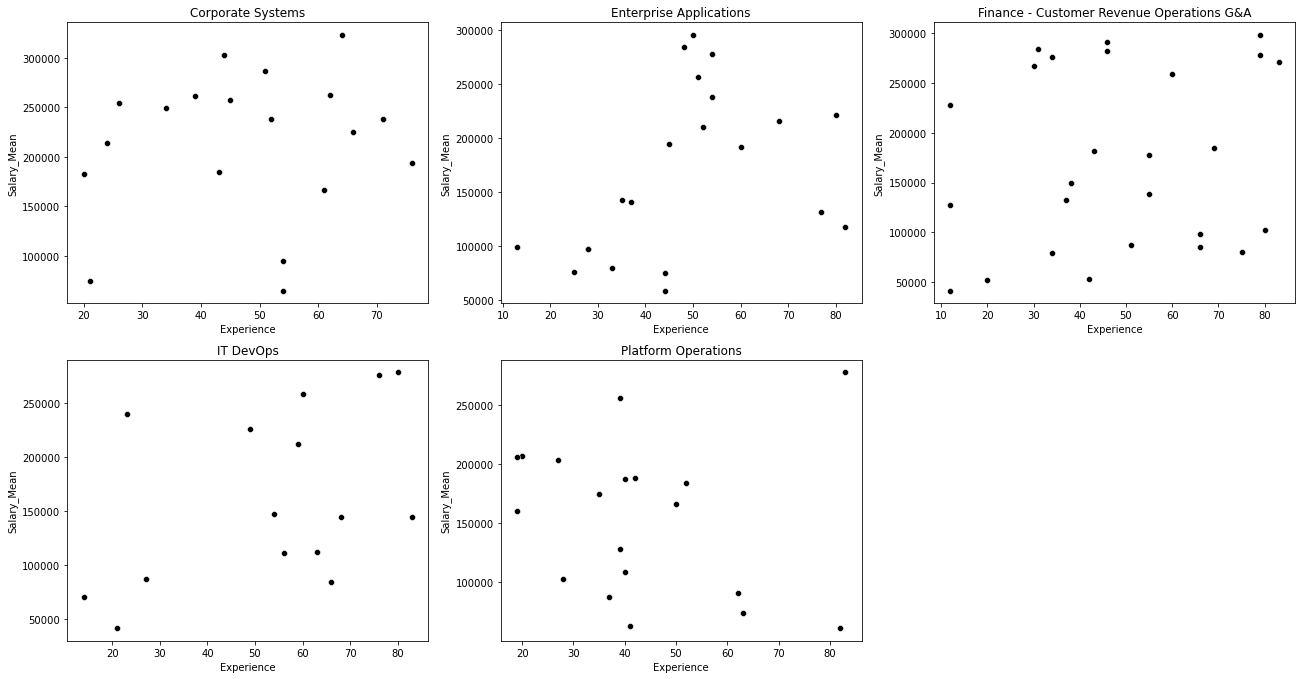

In [17]:
plt.figure(figsize=(22, 30))
i = 1
for name, group in base.groupby('Department'):
    plt.subplot(5, 3, i)
    sns.scatterplot(x=group['Experience'], y=group['Salary_Mean'], color='Black', label=name, legend=False)
    plt.title(name)
    i += 1
plt.show()

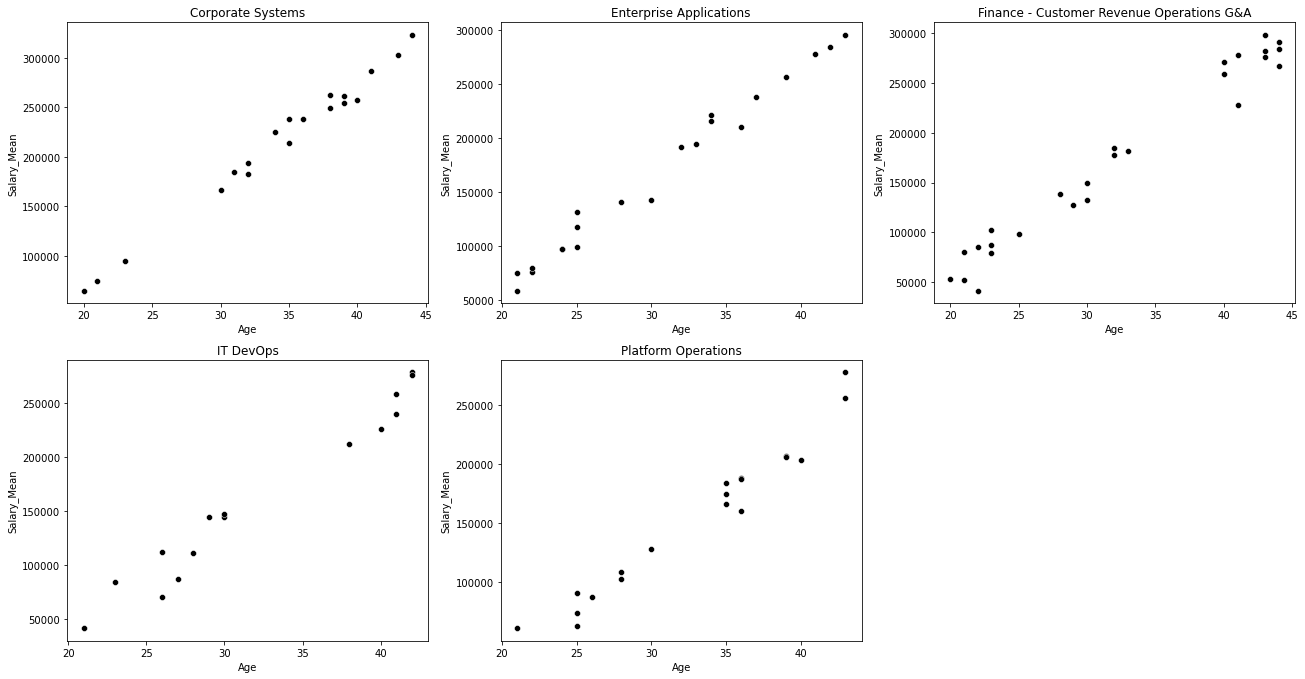

In [18]:
plt.figure(figsize=(22, 30))
i = 1
for name, group in base.groupby('Department'):
    plt.subplot(5, 3, i)
    sns.scatterplot(x=group['Age'], y=group['Salary_Mean'], color='Black', label=name, legend=False)
    plt.title(name)
    i += 1
plt.show()

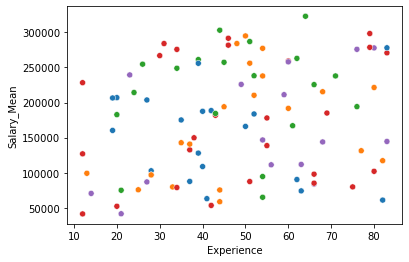

In [19]:
sns.scatterplot(x='Experience', y='Salary_Mean', data=base, hue='Department', legend = False)
plt.show()

In [20]:
Salary_original = df1['GROSS'].describe()
Age_original = df1['Age'].describe()
Exp_original = df1['Tenure_in_org_in_months'].describe()

In [21]:
Salary_simulated = base2['Salary_Mean'].describe()
Age_sample = base2['age'].describe()
Exp_sample = base2['Experience'].describe()

In [22]:
stats = pd.concat([Salary_original, Salary_simulated, Age_original, Age_sample, Exp_original, Exp_sample], axis=1)
stats.rename(columns = {'GROSS' : 'Salary_original', 'Salary_Mean' : 'Salary_simulated', 'Age':'Age_original','age':'Age_sample','Tenure_in_org_in_months':'Exp_original','Experience':'Exp_sample'}, inplace = True)

In [23]:
stats.round(2)

,Salary_original,Salary_simulated,Age_original,Age_sample,Exp_original,Exp_sample
count,403.00,100.00,403.00,100.00,403.00,100.00
mean,158439.91,174384.91,30.75,32.35,49.77,47.87
std,96807.58,79185.76,4.91,7.59,36.88,19.68
min,256.00,41285.00,21.00,20.00,6.00,12.00
25%,97671.00,97675.91,27.00,25.00,15.00,34.00
50%,133337.00,182311.16,30.00,32.00,41.00,47.00
75%,197810.50,250326.05,34.00,39.25,72.00,62.25
max,1024965.00,322999.12,56.00,44.00,173.00,83.00


## 5 Sensitivity Analysis

### 5.1 Change of departments and range of required experience

In [24]:
departments2 = ['Americas- AMG', 'AmaTec - Americas TSE', 'APJ Security Services - SOCC','Enterprise Infrastructure Services','Media Portal']
df2 = df.copy()
df2 = df[df['Department'].isin(departments2)]

In a further step, we repeat the simulation model (from point 3), changing only the experience interval. In this case, it will be a change of 1-5 years and 1-10 years.

In [25]:
X1 = df2[['Age', 'Gender', 'Tenure_in_org_in_months','Department']]
y1 = df2["GROSS"]

#label_encoder = LabelEncoder()
X1["Gender"] = label_encoder.fit_transform(X1["Gender"])
X1["Department"] = label_encoder.fit_transform(X1["Department"])

#scaler = StandardScaler()
X1 = scaler.fit_transform(X1)

C:\Users\skach\AppData\Local\Temp/ipykernel_3408/702678156.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1["Gender"] = label_encoder.fit_transform(X1["Gender"])
C:\Users\skach\AppData\Local\Temp/ipykernel_3408/702678156.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1["Department"] = label_encoder.fit_transform(X1["Department"])


In [26]:
num_employees1 = 100

new_employees1 = pd.DataFrame({
    'Age': np.random.randint(20,45, size=num_employees1),
    'Gender': np.random.choice(df2['Gender'], size=num_employees1),
    'Experience': np.random.randint(12,120, size=num_employees1),
    'Department': np.random.choice(df2['Department'], size=num_employees1)
})

base_a = new_employees1.copy()

new_employees1["Gender"] = label_encoder.fit_transform(new_employees1["Gender"])
new_employees1["Department"] = label_encoder.fit_transform(new_employees1["Department"])

new_employees1 = scaler.transform(new_employees1)

In [27]:
simulations1 = 100
simulation_results1 = []
for i in range(simulations1):
    X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2)
    model = LinearRegression()
    model.fit(X_train1, y_train1)
    y_pred1 = model.predict(X_test1)
    mae = mean_absolute_error(y_test1, y_pred1)
    #print("Mean Absolute Error:", mae)

    predicted_salary1 = model.predict(new_employees1)
    simulation_results1.append(predicted_salary1)

In [28]:
for i, array in enumerate(simulation_results1):
    base_a["Pred_salary_"+str(i+1)] = array
    
base_a['Salary_Mean'] = base_a.loc[:,'Pred_salary_1':'Pred_salary_100'].mean(axis=1)
base2_a = base_a.drop(base_a.loc[:, 'Pred_salary_1':'Pred_salary_100'].columns, axis=1)
base2_a.rename(columns = {'Age':'age'}, inplace=True)

C:\Users\skach\AppData\Local\Temp/ipykernel_3408/3237621776.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  base_a["Pred_salary_"+str(i+1)] = array
C:\Users\skach\AppData\Local\Temp/ipykernel_3408/3237621776.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  base_a['Salary_Mean'] = base_a.loc[:,'Pred_salary_1':'Pred_salary_100'].mean(axis=1)


In [29]:
base2_a.head(10)

,age,Gender,Experience,Department,Salary_Mean
0,34,M,46,Americas- AMG,183421.716036
1,21,M,66,AmaTec - Americas TSE,81589.032597
2,40,F,81,Americas- AMG,232086.037510
3,23,M,79,Americas- AMG,102442.719676
4,25,F,116,Media Portal,119595.564780
5,34,M,114,Americas- AMG,203715.515610
6,22,F,19,Americas- AMG,64956.117990
7,31,M,110,Media Portal,178670.451494
8,25,M,60,AmaTec - Americas TSE,112826.569739
9,22,M,15,Media Portal,76005.445076


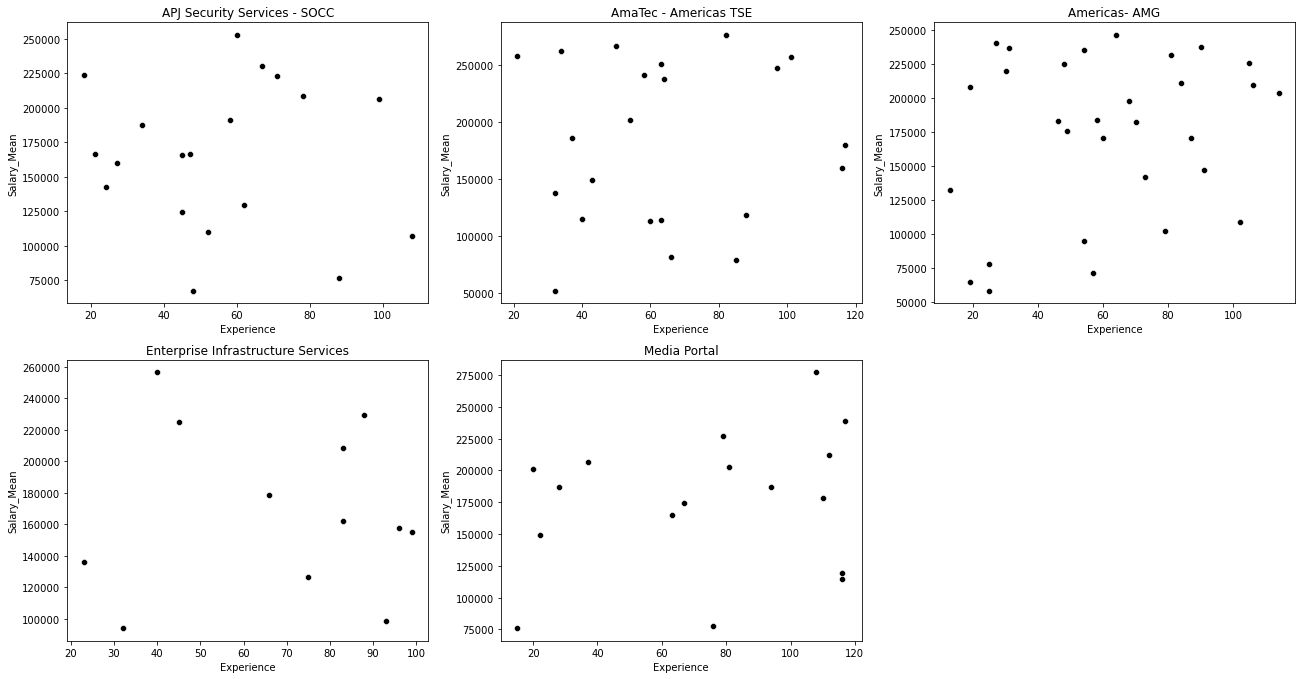

In [30]:
plt.figure(figsize=(22, 30))
i = 1
for name, group in base_a.groupby('Department'):
    plt.subplot(5, 3, i)
    sns.scatterplot(x=group['Experience'], y=group['Salary_Mean'], color='Black', label=name, legend=False)
    plt.title(name)
    i += 1
plt.show()

In [31]:
Salary_original = df2['GROSS'].describe()
Age_original = df2['Age'].describe()
Exp_original = df2['Tenure_in_org_in_months'].describe()

In [32]:
Salary_simulated = base2_a['Salary_Mean'].describe()
Age_sample = base2_a['age'].describe()
Exp_sample = base2_a['Experience'].describe()

In [33]:
stats2 = pd.concat([Salary_original, Salary_simulated, Age_original, Age_sample, Exp_original, Exp_sample], axis=1)
stats2.rename(columns = {'GROSS' : 'Salary_original', 'Salary_Mean' : 'Salary_simulated', 'Age':'Age_original','age':'Age_sample','Tenure_in_org_in_months':'Exp_original','Experience':'Exp_sample'}, inplace = True)

In [34]:
stats2.round(2)

,Salary_original,Salary_simulated,Age_original,Age_sample,Exp_original,Exp_sample
count,273.00,100.00,273.00,100.00,273.00,100.00
mean,153393.04,173457.42,30.93,32.45,40.23,63.68
std,80711.02,58841.68,4.94,7.01,27.92,29.59
min,2511.00,51861.82,22.00,20.00,6.00,13.00
25%,97879.00,125961.04,27.00,26.75,16.00,39.25
50%,123560.00,179025.13,30.00,33.00,36.00,63.00
75%,189750.00,223983.01,34.00,38.00,55.00,87.25
max,559084.00,277158.07,47.00,44.00,153.00,117.00


### 5.2 Increase original wages by 5%

In [35]:
df3 = df1.copy()
df3['GROSS'] = df3['GROSS'] * 1.05

In [36]:
X2 = df3[['Age', 'Gender', 'Tenure_in_org_in_months','Department']]
y2 = df3["GROSS"]

#label_encoder = LabelEncoder()
X2["Gender"] = label_encoder.fit_transform(X2["Gender"])
X2["Department"] = label_encoder.fit_transform(X2["Department"])

#scaler = StandardScaler()
X2 = scaler.fit_transform(X2)

C:\Users\skach\AppData\Local\Temp/ipykernel_3408/387157329.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2["Gender"] = label_encoder.fit_transform(X2["Gender"])
C:\Users\skach\AppData\Local\Temp/ipykernel_3408/387157329.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2["Department"] = label_encoder.fit_transform(X2["Department"])


In [37]:
num_employees2 = 100

new_employees2 = pd.DataFrame({
    'Age': np.random.randint(20,45, size=num_employees2),
    'Gender': np.random.choice(df3['Gender'], size=num_employees2),
    'Experience': np.random.randint(12,84, size=num_employees2),
    'Department': np.random.choice(df3['Department'], size=num_employees2)
})

base_b = new_employees2.copy()

new_employees2["Gender"] = label_encoder.fit_transform(new_employees2["Gender"])
new_employees2["Department"] = label_encoder.fit_transform(new_employees2["Department"])

new_employees2 = scaler.transform(new_employees2)

In [38]:
simulations2 = 100
simulation_results2 = []
for i in range(simulations2):
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2)
    model = LinearRegression()
    model.fit(X_train2, y_train2)
    y_pred2 = model.predict(X_test2)
    mae = mean_absolute_error(y_test2, y_pred2)
    #print("Mean Absolute Error:", mae)

    predicted_salary2 = model.predict(new_employees2)
    simulation_results2.append(predicted_salary2)

In [39]:
for i, array in enumerate(simulation_results2):
    base_b["Pred_salary_"+str(i+1)] = array

base_b['Salary_Mean'] = base_b.loc[:,'Pred_salary_1':'Pred_salary_100'].mean(axis=1)
base2_b = base_b.drop(base_b.loc[:, 'Pred_salary_1':'Pred_salary_100'].columns, axis=1)
base2_b.rename(columns = {'Age':'age'}, inplace=True)

C:\Users\skach\AppData\Local\Temp/ipykernel_3408/2263864728.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  base_b["Pred_salary_"+str(i+1)] = array
C:\Users\skach\AppData\Local\Temp/ipykernel_3408/2263864728.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  base_b['Salary_Mean'] = base_b.loc[:,'Pred_salary_1':'Pred_salary_100'].mean(axis=1)


In [40]:
base2_b.head(10)

,age,Gender,Experience,Department,Salary_Mean
0,30,M,58,IT DevOps,156550.808379
1,34,M,83,Enterprise Applications,233838.989387
2,20,M,72,Platform Operations,49223.436708
3,37,M,36,Corporate Systems,251516.203357
4,44,F,24,Finance - Customer Revenue Operations G&A,277702.390144
5,37,M,47,Enterprise Applications,245887.429451
6,28,M,56,IT DevOps,134843.597028
7,25,M,51,Finance - Customer Revenue Operations G&A,112645.179361
8,41,M,60,Enterprise Applications,294035.477605
9,21,M,63,Finance - Customer Revenue Operations G&A,77646.090798


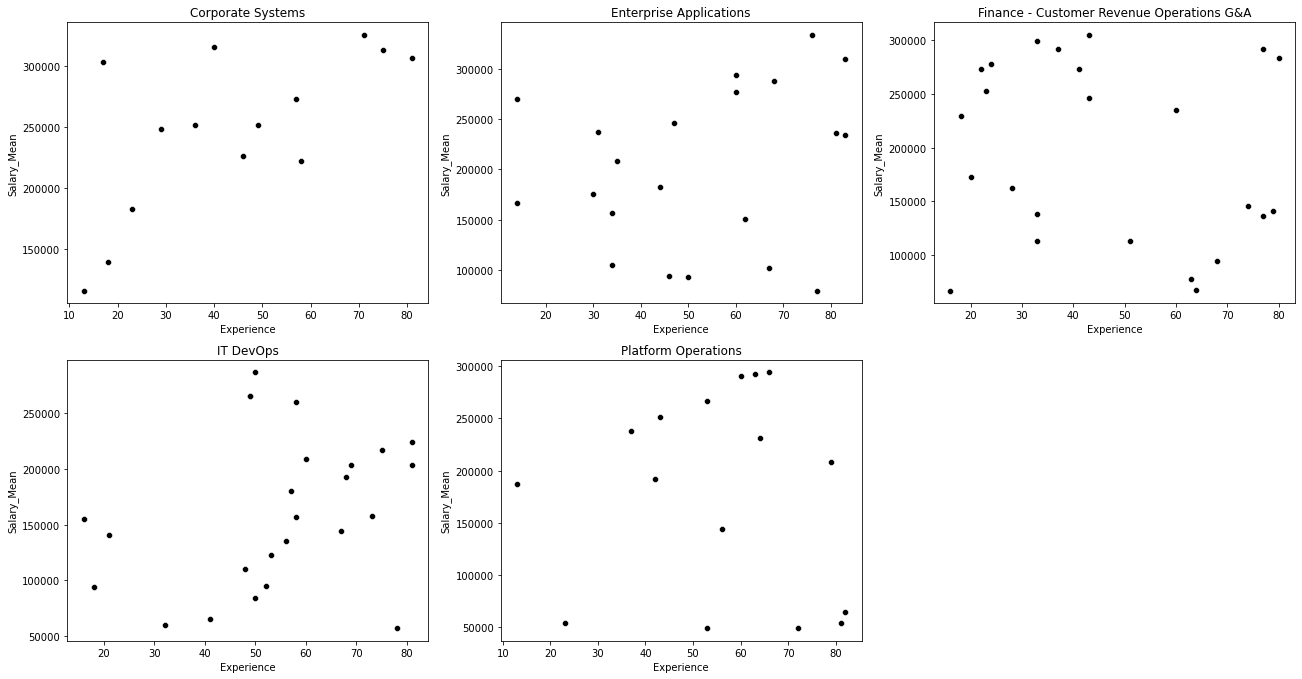

In [41]:
plt.figure(figsize=(22, 30))
i = 1
for name, group in base_b.groupby('Department'):
    plt.subplot(5, 3, i)
    sns.scatterplot(x=group['Experience'], y=group['Salary_Mean'], color='Black', label=name, legend=False)
    plt.title(name)
    i += 1
plt.show()

In [42]:
Salary_original = df3['GROSS'].describe()
Age_original = df3['Age'].describe()
Exp_original = df3['Tenure_in_org_in_months'].describe()

In [43]:
Salary_simulated = base2_b['Salary_Mean'].describe()
Age_sample = base2_b['age'].describe()
Exp_sample = base2_b['Experience'].describe()

In [44]:
stats3 = pd.concat([Salary_original, Salary_simulated, Age_original, Age_sample, Exp_original, Exp_sample], axis=1)
stats3.rename(columns = {'GROSS' : 'Salary_original', 'Salary_Mean' : 'Salary_simulated', 'Age':'Age_original','age':'Age_sample','Tenure_in_org_in_months':'Exp_original','Experience':'Exp_sample'}, inplace = True)

In [45]:
stats3.round(2)

,Salary_original,Salary_simulated,Age_original,Age_sample,Exp_original,Exp_sample
count,403.00,100.00,403.00,100.00,403.00,100.00
mean,166361.90,193465.09,30.75,33.36,49.77,50.63
std,101647.96,81748.30,4.91,7.56,36.88,20.92
min,268.80,49223.44,21.00,20.00,6.00,13.00
25%,102554.55,131867.22,27.00,26.75,15.00,33.75
50%,140003.85,203482.91,30.00,34.00,41.00,51.50
75%,207701.03,265675.59,34.00,40.00,72.00,68.00
max,1076213.25,333433.75,56.00,44.00,173.00,83.00


### 5.3 Change in the number of simulations and employees

In [46]:
num_employees3 = 1000

new_employees3 = pd.DataFrame({
    'Age': np.random.randint(20,45, size=num_employees3),
    'Gender': np.random.choice(df1['Gender'], size=num_employees3),
    'Experience': np.random.randint(12,84, size=num_employees3),
    'Department': np.random.choice(df1['Department'], size=num_employees3)
})

base_c = new_employees3.copy()

new_employees3["Gender"] = label_encoder.fit_transform(new_employees3["Gender"])
new_employees3["Department"] = label_encoder.fit_transform(new_employees3["Department"])

new_employees3 = scaler.transform(new_employees3)

In [47]:
simulations3 = 1000
simulation_results3 = []
for i in range(simulations3):
    X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2)
    model = LinearRegression()
    model.fit(X_train3, y_train3)
    y_pred3 = model.predict(X_test3)
    mae = mean_absolute_error(y_test3, y_pred3)
    #print("Mean Absolute Error:", mae)

    predicted_salary3 = model.predict(new_employees3)
    simulation_results3.append(predicted_salary3)

In [48]:
for i, array in enumerate(simulation_results3):
    base_c["Pred_salary_"+str(i+1)] = array

base_c['Salary_Mean'] = base_c.loc[:,'Pred_salary_1':'Pred_salary_1000'].mean(axis=1)
base2_c = base_c.drop(base_c.loc[:, 'Pred_salary_1':'Pred_salary_1000'].columns, axis=1)
base2_c.rename(columns = {'Age':'age'}, inplace=True)

C:\Users\skach\AppData\Local\Temp/ipykernel_3408/735700371.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  base_c["Pred_salary_"+str(i+1)] = array
C:\Users\skach\AppData\Local\Temp/ipykernel_3408/735700371.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  base_c['Salary_Mean'] = base_c.loc[:,'Pred_salary_1':'Pred_salary_1000'].mean(axis=1)


In [49]:
base2_c.head(10)

,age,Gender,Experience,Department,Salary_Mean
0,35,M,49,IT DevOps,193444.911359
1,34,M,44,Corporate Systems,214165.235425
2,40,M,80,Corporate Systems,291363.215931
3,34,F,14,IT DevOps,149560.637840
4,42,M,13,IT DevOps,244134.843720
5,30,M,56,Enterprise Applications,169845.420230
6,39,M,25,Finance - Customer Revenue Operations G&A,231707.129904
7,44,F,49,Corporate Systems,298685.800090
8,35,F,15,IT DevOps,159902.969320
9,36,M,67,Platform Operations,201341.553284


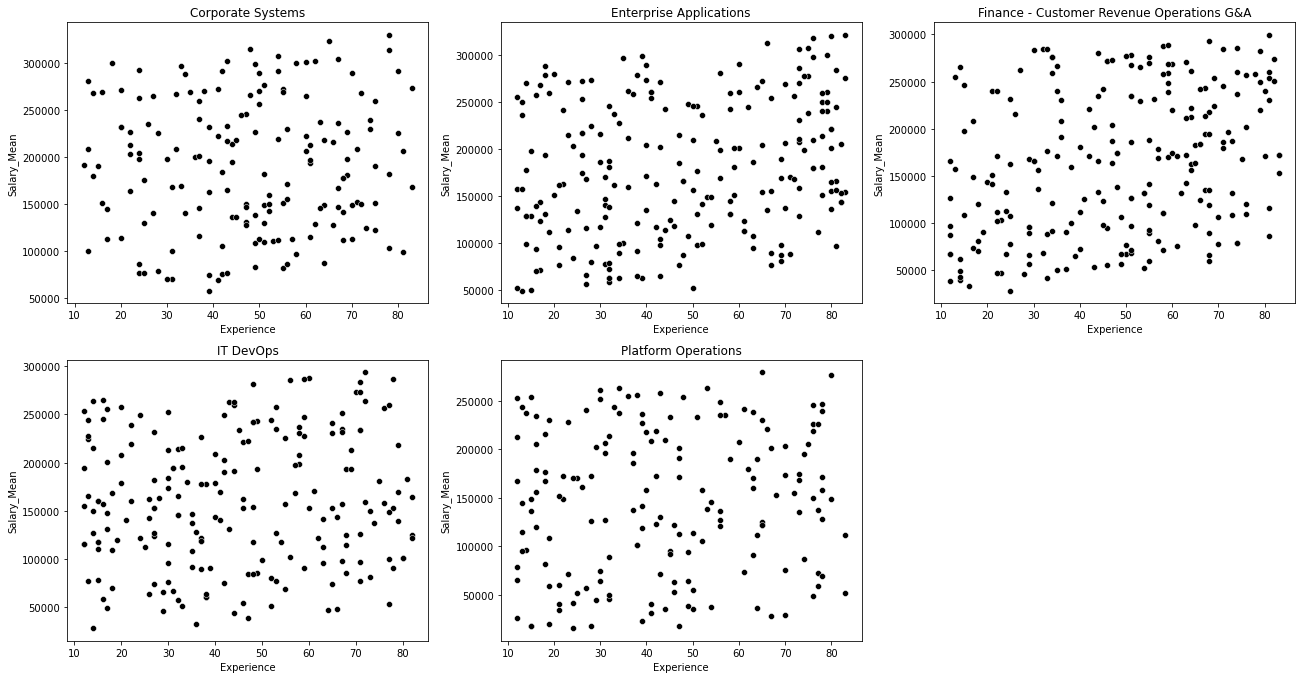

In [50]:
plt.figure(figsize=(22, 30))
i = 1
for name, group in base_c.groupby('Department'):
    plt.subplot(5, 3, i)
    sns.scatterplot(x=group['Experience'], y=group['Salary_Mean'], color='Black', label=name, legend=False)
    plt.title(name)
    i += 1
plt.show()

In [51]:
Salary_original = df1['GROSS'].describe()
Age_original = df1['Age'].describe()
Exp_original = df1['Tenure_in_org_in_months'].describe()

In [52]:
Salary_simulated = base2_c['Salary_Mean'].describe()
Age_sample = base2_c['age'].describe()
Exp_sample = base2_c['Experience'].describe()

In [53]:
stats4 = pd.concat([Salary_original, Salary_simulated, Age_original, Age_sample, Exp_original, Exp_sample], axis=1)
stats4.rename(columns = {'GROSS' : 'Salary_original', 'Salary_Mean' : 'Salary_simulated', 'Age':'Age_original','age':'Age_sample','Tenure_in_org_in_months':'Exp_original','Experience':'Exp_sample'}, inplace = True)

In [54]:
stats4.round(2)

,Salary_original,Salary_simulated,Age_original,Age_sample,Exp_original,Exp_sample
count,403.00,1000.00,403.00,1000.00,403.00,1000.00
mean,158439.91,167475.11,30.75,31.80,49.77,46.47
std,96807.58,73279.42,4.91,7.14,36.88,20.84
min,256.00,15693.44,21.00,20.00,6.00,12.00
25%,97671.00,110696.50,27.00,26.00,15.00,29.00
50%,133337.00,165368.41,30.00,32.00,41.00,47.00
75%,197810.50,230927.53,34.00,38.00,72.00,65.00
max,1024965.00,329703.74,56.00,44.00,173.00,83.00
